All Rights Reserved @cimple-chandu

In [ ]:
import random
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
#data generators

DATASET_DIR = "C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice_Leaf_AUG/Rice_Leaf_AUG"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

datagen = ImageDataGenerator(rescale=1./255)
all_data_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

filenames = all_data_gen.filepaths
classes = all_data_gen.classes
class_labels = list(all_data_gen.class_indices.keys())

data = pd.DataFrame({
    'filename': filenames,
    'class': [class_labels[k] for k in classes]
})

train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['class'], random_state=SEED)
val_data, test_data = train_test_split(test_data, test_size=0.5, stratify=test_data['class'], random_state=SEED)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 13840 images belonging to 10 classes.
Found 11072 validated image filenames belonging to 10 classes.
Found 1384 validated image filenames belonging to 10 classes.
Found 1384 validated image filenames belonging to 10 classes.


Error loading image from G:\My Drive\Rice_Leaf_AUG\Neck Blast\IMG20201108163458_00.jpg. Skipping this image.


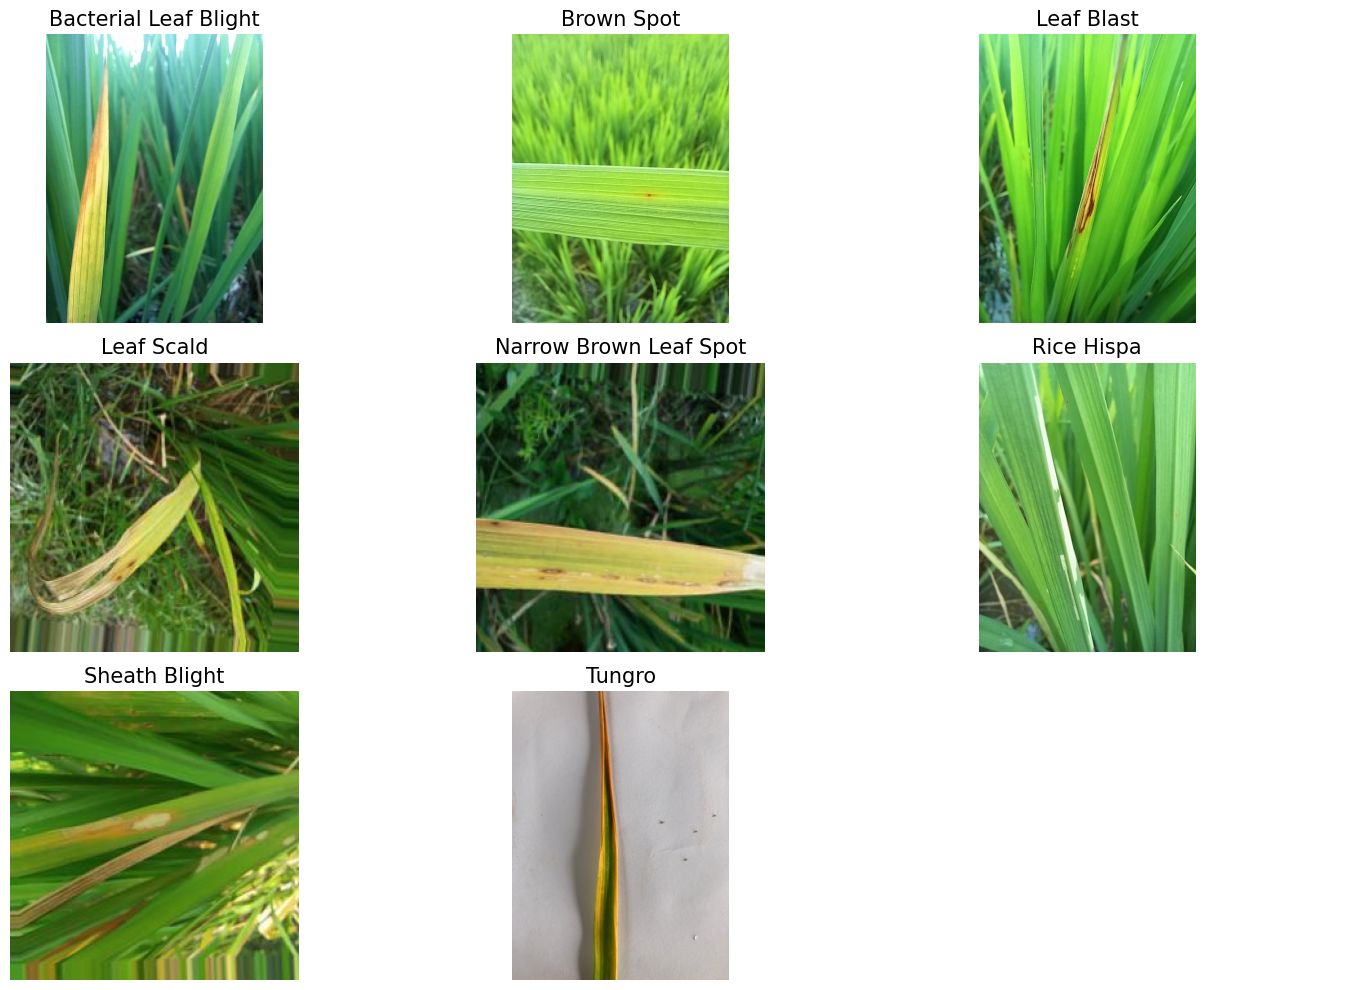

In [65]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the directories
BacterialLeafBlight = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Bacterial Leaf Blight")
BrownSpot = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Brown Spot")
LeafBlast = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Leaf Blast")
Leafscald = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Leaf scald")
NarrowBrownLeafSpot = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Narrow Brown Leaf Spot")
RiceHispa = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Rice Hispa")
ShealthBlight = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Sheath Blight")
Tungro = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\tungro")
NeckBlast = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Neck_Blast")

# List of directories and corresponding titles
directories = [
    (BacterialLeafBlight, 'Bacterial Leaf Blight'),
    (BrownSpot, 'Brown Spot'),
    (LeafBlast, 'Leaf Blast'),
    (Leafscald, 'Leaf Scald'),
    (NarrowBrownLeafSpot, 'Narrow Brown Leaf Spot'),
    (RiceHispa, 'Rice Hispa'),
    (ShealthBlight, 'Sheath Blight'),
    (Tungro, 'Tungro'),
    (NeckBlast, 'Neck Blast')
]

# Create the figure with a specific canvas size
plt.figure(figsize=(15, 10), facecolor='white')  # Set canvas size

# Loop through the directories and plot one image from each
for i, (img_list, title) in enumerate(directories):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns for 9 images
    
    # Check if the directory is not empty and select the first image
    if img_list:
        img_path = os.path.join(r"G:\My Drive\Rice_Leaf_AUG", title, img_list[0])  # Use the first image in each class
        
        # Read the image
        img = cv2.imread(img_path)
        
        # Check if the image was loaded correctly
        if img is not None:
            # Convert the image from BGR to RGB because OpenCV reads in BGR format
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Display the image
            plt.imshow(img_rgb)
            plt.title(title, fontsize=15)  # Title as class name
            plt.axis('off')  # Hide the axis for a cleaner display
        else:
            print(f"Error loading image from {img_path}. Skipping this image.")
            plt.axis('off')  # If there's an error, hide the axis and move to the next plot
    else:
        print(f"No images found in directory: {title}. Skipping this directory.")
        plt.axis('off')  # If no images, skip the subplot and hide the axis

# Adjust layout to ensure the images do not overlap
plt.tight_layout()

# Show the plot
plt.show()


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


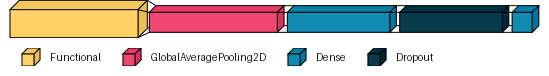

<Figure size 1500x1000 with 0 Axes>

In [66]:
plt.figure(figsize=(15,10),facecolor="white")
import visualkeras
visualkeras.layered_view(model,legend=True)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# 2. Load MobileNetV2 model with pre-trained weights (ImageNet)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to avoid updating during initial training
base_model.trainable = False

# 3. Create the final model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 4. Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    verbose=2
)

Epoch 1/20


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


346/346 - 466s - 1s/step - accuracy: 0.5799 - loss: 1.2316 - val_accuracy: 0.7355 - val_loss: 0.7757
Epoch 2/20
346/346 - 423s - 1s/step - accuracy: 0.7410 - loss: 0.7502 - val_accuracy: 0.8006 - val_loss: 0.6023
Epoch 3/20
346/346 - 423s - 1s/step - accuracy: 0.8015 - loss: 0.5907 - val_accuracy: 0.8186 - val_loss: 0.5103
Epoch 4/20
346/346 - 487s - 1s/step - accuracy: 0.8410 - loss: 0.4833 - val_accuracy: 0.8577 - val_loss: 0.4432
Epoch 5/20
346/346 - 468s - 1s/step - accuracy: 0.8692 - loss: 0.4128 - val_accuracy: 0.8743 - val_loss: 0.3921
Epoch 6/20
346/346 - 409s - 1s/step - accuracy: 0.8937 - loss: 0.3465 - val_accuracy: 0.8866 - val_loss: 0.3539
Epoch 7/20
346/346 - 399s - 1s/step - accuracy: 0.9091 - loss: 0.3002 - val_accuracy: 0.8960 - val_loss: 0.3265
Epoch 8/20
346/346 - 406s - 1s/step - accuracy: 0.9223 - loss: 0.2611 - val_accuracy: 0.8996 - val_loss: 0.3102
Epoch 9/20
346/346 - 409s - 1s/step - accuracy: 0.9339 - loss: 0.2313 - val_accuracy: 0.9111 - val_loss: 0.2830
Epo

In [7]:
model.save(r'G:\My Drive\Mobilenetv2_final_94.h5')

In [6]:
score = model.evaluate(test_generator)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

   2/1384 ━━━━━━━━━━━━━━━━━━━━ 2:19 101ms/step - accuracy: 1.0000 - loss: 9.1141e-04

c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1384/1384 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.9429 - loss: 0.1643
Test loss: 0.17539623379707336
Test accuracy: 0.9421965479850769


In [ ]:
# 6. Fine-tune the model (optional)
# Unfreeze some layers of MobileNetV2 and train again for better accuracy
model.trainable = True


model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train again for fine-tuning
history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=2
)

# 7. Evaluate the model
score = model.evaluate(test_generator)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/10
346/346 - 262s - 758ms/step - accuracy: 0.9925 - loss: 0.0491 - val_accuracy: 0.9516 - val_loss: 0.1517
Epoch 2/10
346/346 - 230s - 665ms/step - accuracy: 0.9946 - loss: 0.0439 - val_accuracy: 0.9538 - val_loss: 0.1491
Epoch 3/10
346/346 - 230s - 665ms/step - accuracy: 0.9937 - loss: 0.0434 - val_accuracy: 0.9545 - val_loss: 0.1469
Epoch 4/10
346/346 - 230s - 665ms/step - accuracy: 0.9955 - loss: 0.0393 - val_accuracy: 0.9552 - val_loss: 0.1467
Epoch 5/10
346/346 - 226s - 654ms/step - accuracy: 0.9956 - loss: 0.0383 - val_accuracy: 0.9545 - val_loss: 0.1440
Epoch 6/10
346/346 - 226s - 653ms/step - accuracy: 0.9952 - loss: 0.0377 - val_accuracy: 0.9552 - val_loss: 0.1428
Epoch 7/10
346/346 - 227s - 657ms/step - accuracy: 0.9967 - loss: 0.0371 - val_accuracy: 0.9552 - val_loss: 0.1458
Epoch 8/10
346/346 - 224s - 649ms/step - accuracy: 0.9964 - loss: 0.0367 - val_accuracy: 0.9545 - val_loss: 0.1402
Epoch 9/10
346/346 - 224s - 647ms/step - accuracy: 0.9969 - loss: 0.0361 - val_a

In [9]:
model.save(r'G:\My Drive\Mobilenetv2_final_95.h5')

In [2]:
from tensorflow .keras.models import load_model
model=load_model(r'G:\My Drive\Mobilenetv2_10_95.h5')

In [4]:
from tensorflow .keras.models import load_model
model=load_model(r'G:\My Drive\final_models\Mobilenetv2_95.h5')

In [6]:
score = model.evaluate(test_generator, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1384/1384 - 70s - 51ms/step - accuracy: 0.9552 - loss: 0.1412
Test loss: 0.141188845038414
Test accuracy: 0.9552023410797119


Total steps (batches to process): 1384
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9563 - loss: 0.1362
Test Loss: 0.141188845038414
Test Accuracy: 0.9552023410797119
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━

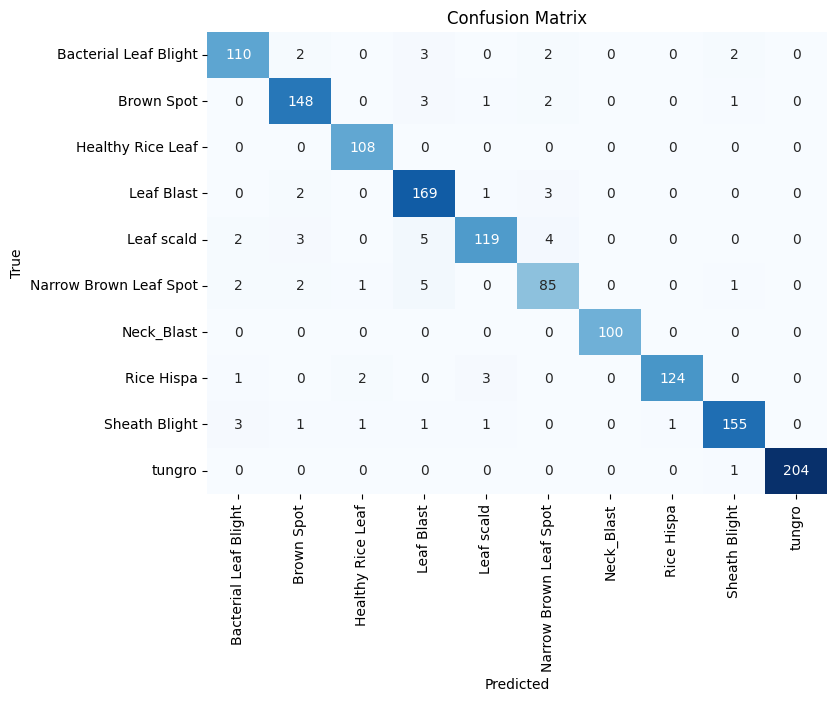

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have these from your trained model
# test_generator: A generator that yields batches of data (X, y)
# model: Your trained Keras/TensorFlow model

# Calculate number of steps based on the number of test images and batch size
steps = np.ceil(test_generator.samples / test_generator.batch_size).astype(int)
print(f"Total steps (batches to process): {steps}")

# Step 1: Evaluate the model on the test generator (optional, if you need to see loss/accuracy)
score = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

# Step 2: Predict the labels on the entire test dataset from the test generator
y_true = []
y_pred = []

# Loop over the test generator and collect the results
for i, (X_batch, y_batch) in enumerate(test_generator):
    y_batch_pred = model.predict(X_batch)  # Get predictions for the batch
    
    y_true.extend(np.argmax(y_batch, axis=1))  # True labels
    y_pred.extend(np.argmax(y_batch_pred, axis=1))  # Predicted labels
    
    # Stop once we have reached the defined number of steps
    if i + 1 >= steps:
        break  # Exit after processing the desired number of batches

# Convert lists to arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 3: Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [15]:
# 4. Precision, Recall, F1-Score
precision = precision_score(y_true, y_pred, average='macro')  # Change to 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.9540
Recall: 0.9525
F1-Score: 0.9530


In [16]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       119
           1       0.94      0.95      0.95       155
           2       0.96      1.00      0.98       108
           3       0.91      0.97      0.94       175
           4       0.95      0.89      0.92       133
           5       0.89      0.89      0.89        96
           6       1.00      1.00      1.00       100
           7       0.99      0.95      0.97       130
           8       0.97      0.95      0.96       163
           9       1.00      1.00      1.00       205

    accuracy                           0.96      1384
   macro avg       0.95      0.95      0.95      1384
weighted avg       0.96      0.96      0.96      1384



In [20]:
y_prob = model.predict(test_generator, verbose=1) 

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step


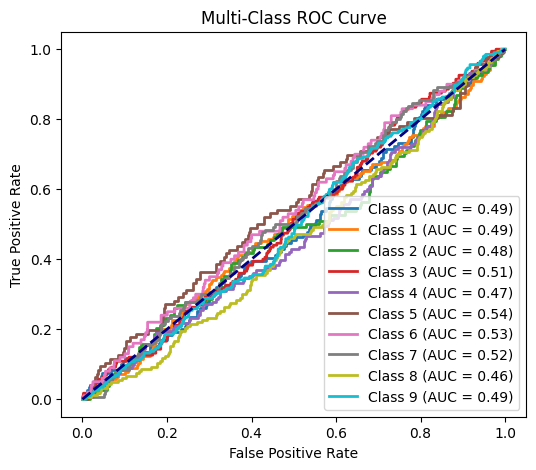

In [21]:
if y_prob.shape[1] > 2:  # Multi-class classification
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(y_prob.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_prob[:, i])  # Binarize for each class
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(6, 5))
    for i in range(len(roc_auc)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


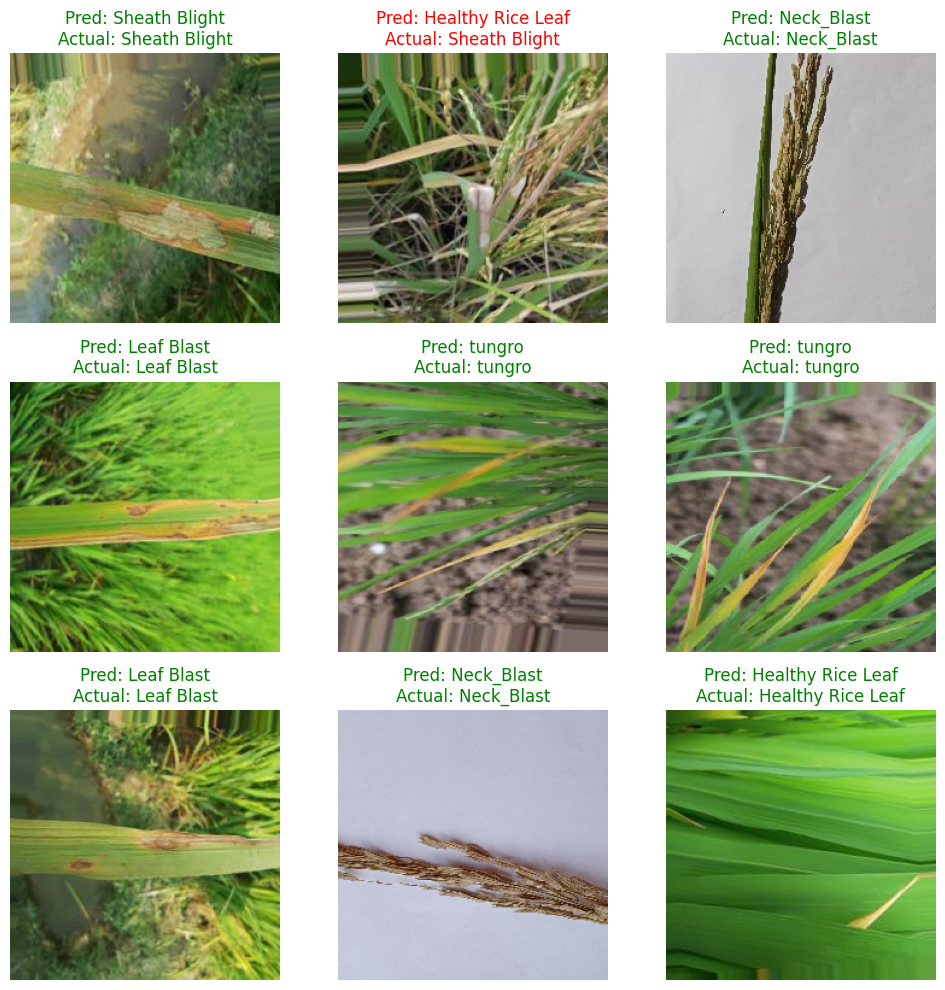

In [26]:
filenames = test_generator.filenames
classes = test_generator.classes
labels = list(test_generator.class_indices.keys())

random_indices = random.sample(range(len(filenames)), 9)
images = []
actual_labels = []
predicted_labels = []

for idx in random_indices:
    img, label = test_generator[idx]
    images.append(img[0])
    actual_labels.append(classes[idx])
    pred = model.predict(img)
    predicted_labels.append(np.argmax(pred))

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    actual_class = labels[actual_labels[i]]
    predicted_class = labels[predicted_labels[i]]
    color = 'green' if actual_class == predicted_class else 'red'
    plt.title(f"Pred: {predicted_class}\nActual: {actual_class}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model(r'G:\My Drive\trained_models\Mobilenetv2_95.h5')

def predict_rice_disease(img):
    # Preprocess the image to the correct format for the model
    img = img.resize((224, 224))  # Assuming the model expects 224x224 images
    img_array = np.array(img) / 255.0  # Normalize if needed
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=-1)[0]  # Get the index of the predicted class
    
    # Map the predicted class index to the disease name (modify according to your class names)
    class_names = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy Rice Leaf', 'Leaf Blast', 'Leaf scald', 'Narrow Brown Leaf Spot', 'Neck_Blast', 'Rice Hispa', 'Sheath Blight', 'tungro'] # Example class names
    return class_names[class_idx]
# Create Gradio interface
interface = gr.Interface(
    fn=predict_rice_disease,  # The function to call for predictions
    inputs=gr.Image(type="pil"),  # Input is an image in PIL format
    outputs=gr.Textbox(),  # Output is a text label showing the disease name
    title="Rice Disease Detection",  # Title of the interface
    description="Upload an image of a rice leaf to detect its disease.",  # Description of the app
)

# Launch the interface
interface.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


In [2]:
pip install gradio


  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached tomlkit-0.13.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached typer-0.15.2-py3-none-any.whl.metadata (15 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/46.9 MB ? eta -:--:--
   - -------------------------------------- 1.8/46.9 MB 14.4 MB/s eta 0:00:04
   --------- ------------------------------ 11.3/46.9 MB 35.2 MB/s eta 0:00:02
   ----------- ----------------------------

In [3]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=r"converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Define class names
class_names = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy Rice Leaf', 'Leaf Blast', 
               'Leaf scald', 'Narrow Brown Leaf Spot', 'Neck_Blast', 'Rice Hispa', 
               'Sheath Blight', 'tungro']  # Make sure these match your model's output order

def predict_rice_disease(img):
    # Resize and preprocess image
    img = img.resize((224, 224))  # Make sure size matches the model input
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize if model expects it
    img_array = np.expand_dims(img_array, axis=0)

    # Set the tensor
    interpreter.set_tensor(input_details[0]['index'], img_array)

    # Run inference
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    class_idx = np.argmax(output_data, axis=-1)[0]

    return class_names[class_idx]

# Create Gradio interface
interface = gr.Interface(
    fn=predict_rice_disease,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(),
    title="Rice Disease Detection",
    description="Upload an image of a rice leaf to detect its disease.",
)

# Launch the interface
interface.launch()


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


ValueError: Could not open 'converted_model.tflite'.